## Ejercicios realizados sobre el Análisis Exploratorio Realizado


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

**a. ¿Cuáles son las 10 películas que contaron con más presupuesto?**


In [23]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Sort the DataFrame by the 'budget' column in descending order
sorted_df = df.sort_values(by='budget', ascending=False)

# Select the top 10 movies with the highest budgets
top_10_budget_films = sorted_df[['originalTitle', 'budget']].head(10)

# Format the 'budget' values as currency (e.g., $1,000,000)
top_10_budget_films['budget'] = top_10_budget_films['budget'].apply(lambda x: f"${x:,.0f}")

# Display the resulting DataFrame with the 'originalTitle' and formatted 'budget' columns
print("El top 10 de las películas con mayor presupuesto es:")
display(top_10_budget_films)

El top 10 de las películas con mayor presupuesto es:


,originalTitle,budget
716,Pirates of the Caribbean: On Stranger Tides,"$380,000,000"
4710,Avengers: Age of Ultron,"$365,000,000"
5952,Avengers: Endgame,"$356,000,000"
5953,Avengers: Infinity War,"$300,000,000"
163,Pirates of the Caribbean: At World's End,"$300,000,000"
4953,Justice League,"$300,000,000"
607,Superman Returns,"$270,000,000"
3791,Tangled,"$260,000,000"
7134,The Lion King,"$260,000,000"
280,Spider-Man 3,"$258,000,000"


**Análisis de las Películas con Mayor Presupuesto**

<small> 
La tabla anterior presenta las 10 películas con los mayores presupuestos en nuestro dataset. "Pirates of the Caribbean: On Stranger Tides" lidera la lista con un presupuesto de $380 millones, seguido de cerca por "Avengers: Age of Ultron" con $365 millones y "Avengers: Endgame" con $356 millones. Estos elevados presupuestos reflejan el alto coste asociado con la producción de películas de gran escala, que a menudo incluyen extensos efectos especiales, grandes elencos y equipos técnicos, así como locaciones globales.

Este grupo de películas destaca por ser predominantemente del género de acción y aventura, lo cual es indicativo de la tendencia de la industria cinematográfica a invertir considerablemente en películas que apuntan a generar grandes taquillas a nivel mundial. La presencia repetida de franquicias como "Avengers" y "Pirates of the Caribbean" subraya la apuesta de los estudios por secuelas y series de películas que ya han demostrado ser exitosas comercialmente.
</small>


**b. ¿Cuáles son las 10 películas que más ingresos tuvieron?**


In [24]:
# Read the CSV file into a DataFrame
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'revenue' column to numeric, coercing errors to NaN
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Sort the DataFrame by the 'revenue' column in descending order and select the top 10 movies
top_revenue_films = df.sort_values(by='revenue', ascending=False)[['originalTitle', 'revenue']].head(10)

# Format the 'revenue' values as currency (e.g., $1,000,000)
top_revenue_films['revenue'] = top_revenue_films['revenue'].apply(lambda x: f"${x:,.0f}")

# Display the resulting DataFrame with the 'originalTitle' and formatted 'revenue' columns
print("El top 10 de peliculas con mayores ingresos es:")
display(top_revenue_films)

El top 10 de peliculas con mayores ingresos es:


,originalTitle,revenue
3210,Avatar,"$2,847,246,203"
5952,Avengers: Endgame,"$2,797,800,564"
307,Titanic,"$2,187,463,944"
4947,Star Wars: The Force Awakens,"$2,068,223,624"
5953,Avengers: Infinity War,"$2,046,239,637"
4914,Jurassic World,"$1,671,713,208"
7134,The Lion King,"$1,667,635,327"
9049,Spider-Man: No Way Home,"$1,631,853,496"
3397,The Avengers,"$1,518,815,515"
5087,Furious 7,"$1,515,047,671"


### Análisis de las Películas con Mayor Presupuesto

<small> La tabla anterior presenta las 10 películas con los mayores presupuestos dentro del dataset. "Pirates of the Caribbean: On Stranger Tides" lidera la lista con un impresionante presupuesto de $380 millones, seguido de cerca por "Avengers: Age of Ultron" con $365 millones y "Avengers: Endgame" con $356 millones. Estos elevados presupuestos reflejan el alto coste asociado con la producción de películas de gran escala, que a menudo incluyen extensos efectos especiales, grandes elencos y equipos técnicos, así como locaciones globales.

Este grupo de películas destaca por ser predominantemente del género de acción y aventura, lo cual es indicativo de la tendencia de la industria cinematográfica a invertir considerablemente en películas que apuntan a generar grandes taquillas a nivel mundial. La presencia repetida de franquicias como "Avengers" y "Pirates of the Caribbean" subraya la apuesta de los estudios por secuelas y series de películas que ya han demostrado ser exitosas comercialmente.
</small>


**c. ¿Cuál es la película que más votos tuvo?**


In [19]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'voteCount' column to numeric, coercing errors to NaN
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')

# Sort the DataFrame by the 'voteCount' column to find the top voted film
top_voted_film = df.loc[df['voteCount'].idxmax()]

print("La película con más votos es:")
display(df.loc[[df['voteCount'].idxmax()]][['originalTitle', 'voteCount']])

La película con más votos es:


,originalTitle,voteCount
3511,Inception,30788


**Película con Mayor Número de Votos**

<small> La película que ha recibido el mayor número de votos dentro del dataset es **Inception**, con un total de **30788** votos. Esto indica no solo una alta participación de la audiencia sino también un gran interés y compromiso del público con esta película, reflejando su popularidad y resonancia cultural. </small>


**d. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?**


In [20]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'voteCount' and 'voteAvg' columns to numeric, coercing errors to NaN
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')
df['voteAverage'] = pd.to_numeric(df['voteAvg'], errors='coerce')

# Filter out films with fewer than 500 votes
min_votes = 500
filtered_df = df[df['voteCount'] > min_votes]

# Find the movie with the lowest average rating
worst_rated_film = filtered_df.loc[filtered_df['voteAvg'].idxmin()]

print("La película con la peor calificación es:")
display(filtered_df.loc[[filtered_df['voteAvg'].idxmin()]][['originalTitle', 'voteAverage', 'voteCount']])

La película con la peor calificación es:


,originalTitle,voteAverage,voteCount
2766,Dragonball Evolution,2.8,1600


**Análisis de la Película con la Peor Calificación según los Usuarios**

<small> La película que ha recibido la calificación más baja de los usuarios dentro del dataset es **Dragonball Evolution**. Con una calificación promedio de **2.8** y **1600** votos, este título refleja una recepción significativamente negativa por parte de la audiencia. La evaluación de los usuarios sugiere que la película no logró satisfacer las expectativas en varios aspectos clave como la trama, la actuación o la producción. </small>


**e. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras**



El año con más películas fue 2021, con un total de 816 películas.


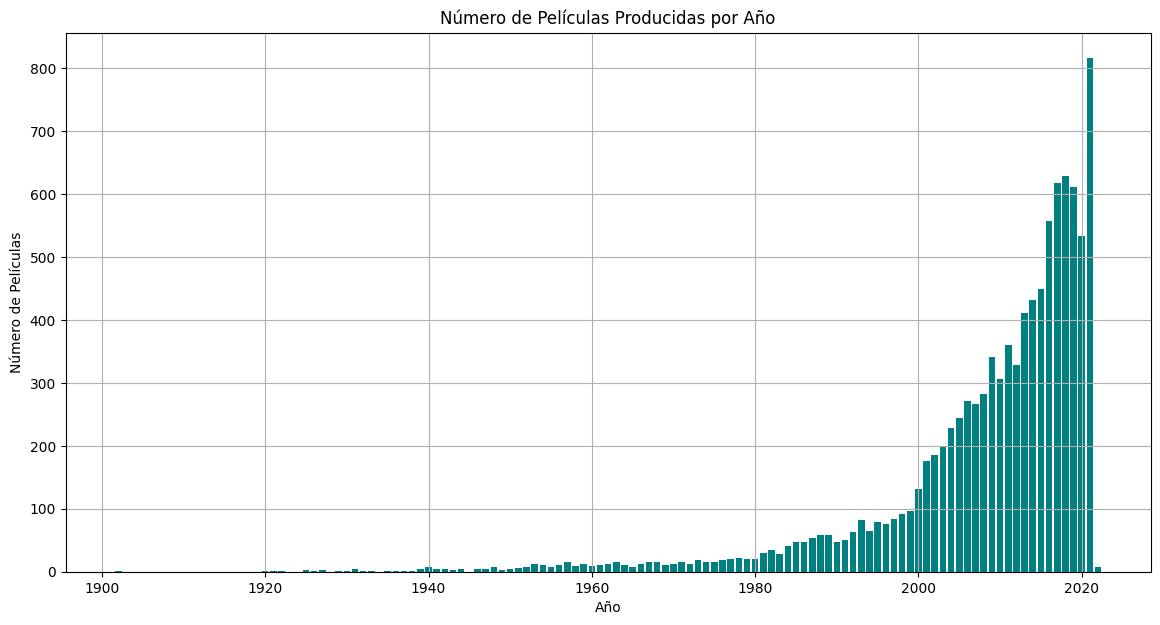

In [26]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'runtime' column to numeric, coercing errors to NaN
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['releaseYear'] = df['releaseDate'].dt.year

# Filter out films with missing runtime values
movies_per_year = df['releaseYear'].value_counts().sort_index()

# Find the year with the most movies
max_year = movies_per_year.idxmax()
# Find the number of movies produced in that year
max_movies = movies_per_year.max()

print(f"\nEl año con más películas fue {max_year}, con un total de {max_movies} películas.")

plt.figure(figsize=(14, 7))
plt.bar(movies_per_year.index, movies_per_year.values, color='teal')
plt.title('Número de Películas Producidas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()

**Análisis del Año con Mayor Producción Cinematográfica**

<small> El análisis del número de películas producidas por año revela una tendencia creciente en la producción cinematográfica, alcanzando un pico en **2021** con un total de **816 películas**. Este incremento es evidente en el gráfico adjunto, que muestra cómo la producción de películas ha aumentado significativamente en las últimas décadas.

El año 2021 se destaca como el año con la producción más alta registrada dentro del dataset. Este fenómeno puede atribuirse a varios factores, incluyendo el avance tecnológico que facilita la producción de películas, una mayor demanda de contenido debido a la expansión de plataformas de streaming, y posiblemente un repunte en la producción tras los retrasos causados por eventos globales como la pandemia de COVID-19, que impactó significativamente la industria en 2020.

Esta tendencia no solo refleja el crecimiento de la industria cinematográfica sino también un cambio en los hábitos de consumo de entretenimiento a nivel mundial, con un enfoque creciente hacia la diversidad de contenido y la accesibilidad digital. Este aumento en la producción también puede estar influenciado por la globalización del cine, donde más países y productores independientes están participando activamente en la creación de películas.

El gráfico de barras proporciona una visualización clara de estas tendencias, mostrando no solo el año con más producciones sino también cómo ha evolucionado la cantidad de películas a lo largo del tiempo, subrayando los cambios significativos y los nuevos desarrollos en la industria del cine.
</small>


**f. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas?**


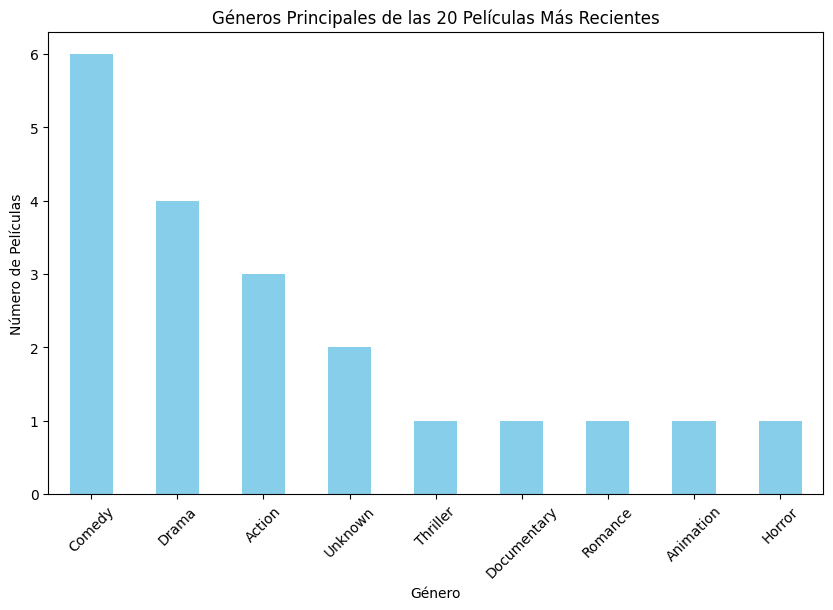

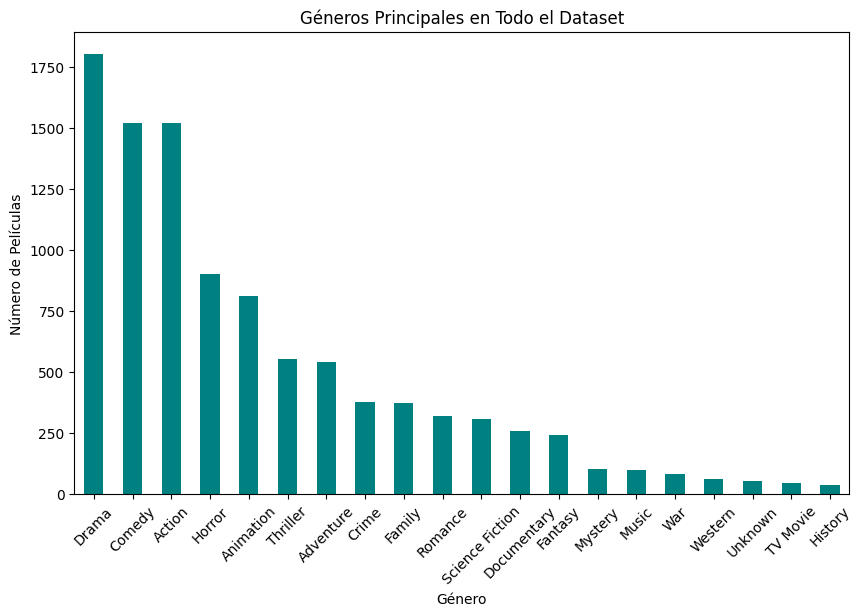

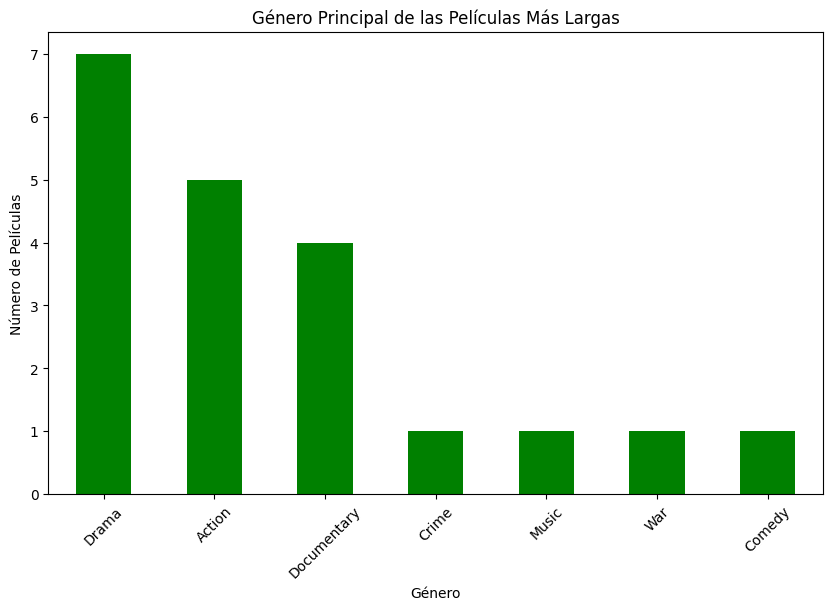

In [30]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['mainGenre'] = df['genres'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else 'Unknown')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Data for the first question: Genres of the 20 most recent films
df.sort_values(by='releaseDate', ascending=False, inplace=True)
recent_20 = df.head(20)
recent_genres_count = recent_20['mainGenre'].value_counts()

# Data for the second question: Predominant genre in the dataset
overall_genres_count = df['mainGenre'].value_counts()

# Data for the third question: Genre of the longest films
df.sort_values(by='runtime', ascending=False, inplace=True)
longest_films_genre = df.head(20)['mainGenre'].value_counts()

# Graph for the first question
plt.figure(figsize=(10, 6))
recent_genres_count.plot(kind='bar', color='skyblue')
plt.title('Géneros Principales de las 20 Películas Más Recientes')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

# Graph for the second question
plt.figure(figsize=(10, 6))
overall_genres_count.plot(kind='bar', color='teal')
plt.title('Géneros Principales en Todo el Dataset')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

# Graph for the third question
plt.figure(figsize=(10, 6))
longest_films_genre.plot(kind='bar', color='green')
plt.title('Género Principal de las Películas Más Largas')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()



**1. ¿Cuál es el género principal de las 20 películas más recientes?**

   <small>
   De las 20 películas más recientes, el género de "Comedia" es el más predominante, seguido por "Drama" y "Acción". Este predominio de la comedia podría sugerir una tendencia hacia películas con un tono más ligero y entretenido en los lanzamientos más recientes, posiblemente como respuesta a una demanda de escapismo y diversión por parte del público.
   </small>

**2. ¿Cuál es el género principal que predomina en el conjunto de datos?**

   <small>
   En el conjunto total de datos, el género "Drama" es el más predominante, seguido de cerca por "Comedia" y "Acción". Esto indica que, a lo largo de los años, las películas de drama han sido consistentemente populares, reflejando quizás su capacidad para explorar una amplia gama de temas humanos y sociales que resuenan con una amplia audiencia.
   </small>

**3. ¿A qué género principal pertenecen las películas más largas?**

   <small>
   Las películas más largas tienden a pertenecer al género de "Drama", seguido por "Acción" y "Documental". Este resultado es coherente con la naturaleza del género dramático, que a menudo se sumerge en narrativas complejas y profundas que requieren un tiempo de ejecución más extenso para desarrollarse completamente. Los documentales y las películas de acción también pueden requerir más tiempo para profundizar en sus respectivos temas o desarrollar secuencias de acción detalladas.
   </small>


**g. ¿Las películas de qué genero principal obtuvieron mayores ganancias?**


In [8]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'revenue' column to numeric, coercing errors to NaN
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Prepare the genre split and ensure there are no NaN values
df['genres'] = df['genres'].fillna('No establecido')  # Fill NaN values with 'No establecido'
split_genres = df['genres'].str.split('|')

#  Calculate the number of repeats per row, handling non-null values correctly
repeats = split_genres.apply(len)

# Expand the 'genres' column to account for all listed genres
all_genres = split_genres.explode()

# Repeat the rows of the original DataFrame according to the number of genres per film
df_expanded = df.loc[df.index.repeat(repeats)].copy()

# Reset the index to align correctly with 'all_genres'
df_expanded.reset_index(drop=True, inplace=True)

# Asign the exploded genres to the expanded DataFrame
df_expanded['genre'] = all_genres.values

# Calculate the revenue split evenly among the genres
df_expanded['revenue_per_genre'] = df_expanded['revenue'] / repeats.loc[repeats.index.repeat(repeats)].values

# Group by genre and sum the adjusted revenues
genre_revenue = df_expanded.groupby('genre')['revenue_per_genre'].sum()

# Sort the results
genre_revenue_sorted = genre_revenue.sort_values(ascending=False)

# Create a DataFrame from the sorted results
genre_revenue_df = genre_revenue_sorted.reset_index()
genre_revenue_df.columns = ['Género', 'Ganancias Totales']

# Format the 'Ganancias Totales' column as currency
genre_revenue_df['Ganancias Totales'] = genre_revenue_df['Ganancias Totales'].apply(lambda x: f"${x:,.0f}")

display(genre_revenue_df)

,Género,Ganancias Totales
0,Action,"$79,290,274,299"
1,Adventure,"$76,793,061,482"
2,Comedy,"$70,650,745,119"
3,Drama,"$65,469,629,316"
4,Thriller,"$42,706,815,001"
5,Fantasy,"$39,746,713,839"
6,Science Fiction,"$38,843,496,279"
7,Family,"$34,094,399,125"
8,Romance,"$27,031,576,981"
9,Animation,"$23,508,453,459"


**Análisis del Género de Película con Mayores Ganancias**

<small> Basado en el análisis de las ganancias totales por género principal en la industria cinematográfica, el género "Acción" lidera con una suma de aproximadamente $79.29 mil millones, seguido muy de cerca por "Aventura" con cerca de $76.79 mil millones. Esto refleja la popularidad y la capacidad de estos géneros para atraer grandes audiencias globales y generar ingresos significativos a través de lanzamientos en cines, mercadotecnia extensiva y ventas de derechos de distribución internacional.

Los géneros "Comedia" y "Drama" también muestran fuertes rendimientos, con ganancias de $70.65 mil millones y $65.47 mil millones, respectivamente, destacando su apelación universal y la flexibilidad para adaptarse a diversos mercados y demografías. Estos géneros tienden a requerir presupuestos más bajos comparados con las grandes producciones de "Acción" y "Aventura", pero aún así logran captar la atención del público y generar ganancias sustanciales.

Por otro lado, géneros como "Documentary" y "TV Movie" muestran ganancias relativamente bajas, lo que puede ser indicativo de su alcance más limitado y nicho de mercado específico. El bajo rendimiento en términos de ingresos de estos géneros podría también reflejar un modelo de distribución diferente, que a menudo no se centra en los ingresos de taquilla sino en plataformas de streaming o ventas directas a televisión.
</small>


**h. ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?**



h.1: ¿La cantidad de actores influye en los ingresos de las películas?

Correlación entre el número de actores y los ingresos: 0.28



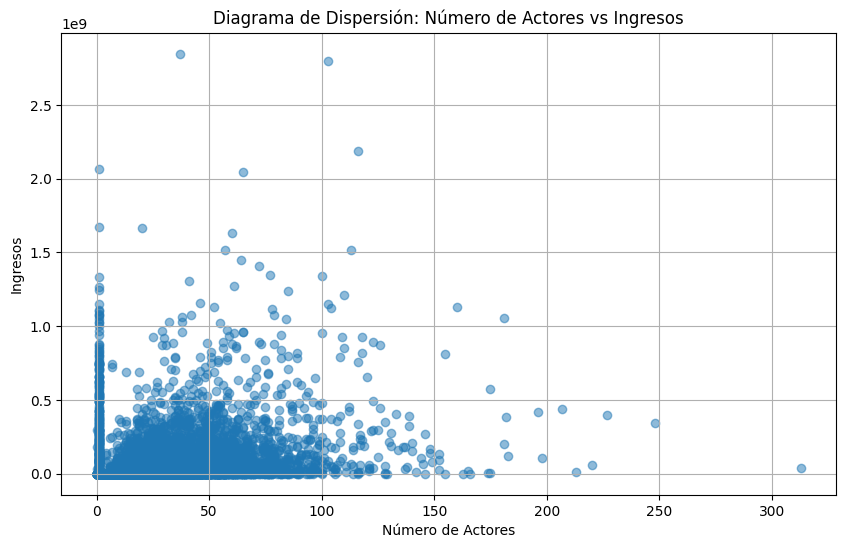

No hay una fuerte correlación entre el número de actores y los ingresos de las películas.
Por lo tanto, no se puede concluir que el número de actores influya significativamente en los ingresos de las películas.

h.2: ¿Se han hecho películas con más actores en los últimos años?



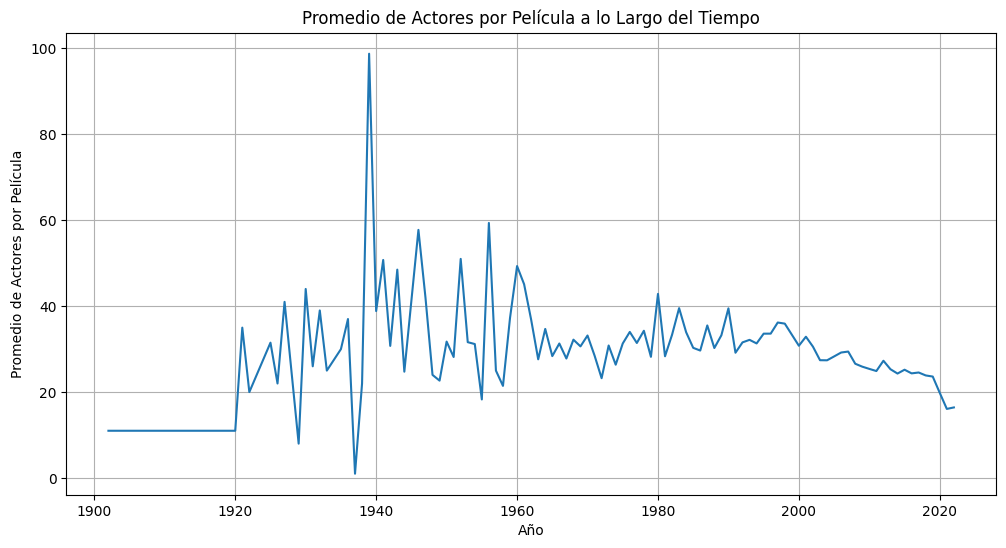

No se ha observado un incremento significativo en el número promedio de actores por película en los últimos años.


In [ ]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'revenue' and 'releaseDate' columns to numeric and datetime types, respectively
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# List of actors in the dataset separated by '|' and split into individual actors
df['numActors'] = df['actors'].fillna('').apply(lambda x: len(x.split('|')) if x != '' else 0)

# Analyze the correlation between the number of actors and revenue
correlation = df['numActors'].corr(df['revenue'])
print("\nh.1: ¿La cantidad de actores influye en los ingresos de las películas?\n")
print(f"Correlación entre el número de actores y los ingresos: {correlation:.2f}\n")

# Create a scatter plot to visualize the relationship between the number of actors and revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['numActors'], df['revenue'], alpha=0.5)
plt.title('Diagrama de Dispersión: Número de Actores vs Ingresos')
plt.xlabel('Número de Actores')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Analyze the correlation and provide a conclusion based on the strength of the correlation
if correlation > 0.5 or correlation < -0.5:
    print("Hay una fuerte correlación entre el número de actores y los ingresos de las películas.\n")
    print("Por lo tanto, es probable que el número de actores influya significativamente en los ingresos de las películas.")
else:
    print("No hay una fuerte correlación entre el número de actores y los ingresos de las películas.")
    print("Por lo tanto, no se puede concluir que el número de actores influya significativamente en los ingresos de las películas.")

# Analyze the trend of the number of actors over time
df['year'] = df['releaseDate'].dt.year
average_actors_per_year = df.groupby('year')['numActors'].mean()

print("\nh.2: ¿Se han hecho películas con más actores en los últimos años?\n")

# Create a graph to visualize the trend of the average number of actors per film over time
plt.figure(figsize=(12, 6))
average_actors_per_year.plot(title='Promedio de Actores por Película a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Promedio de Actores por Película')
plt.grid(True)
plt.show()

# Compare the average number of actors in the most recent years to the previous years
if average_actors_per_year.iloc[-10:].mean() > average_actors_per_year.iloc[:-10].mean():
    print("En los últimos años, se ha observado un incremento en el número promedio de actores por película.")
else:
    print("No se ha observado un incremento significativo en el número promedio de actores por película en los últimos años.")

**Análisis de la Influencia del Número de Actores en los Ingresos de las Películas y sus Tendencias Temporales**

<small> El análisis de correlación entre el número de actores y los ingresos de las películas revela un coeficiente de correlación de 0.28. Esta cifra indica una correlación débil, sugiriendo que la cantidad de actores en una película no tiene un impacto significativo en sus ingresos. En el gráfico, la mayoría de los puntos se aglomeran en el extremo inferior del eje de ingresos, lo que sugiere que tener más actores no garantiza automáticamente mayores ingresos. Este resultado puede deberse a que factores como la trama, la dirección, los efectos especiales y la promoción tienen un peso más determinante en el éxito financiero de una película que simplemente la cantidad de actores que aparecen en ella.

Adicionalmente, al examinar la tendencia del número promedio de actores por película a lo largo del tiempo, observamos que no ha habido un aumento significativo en los últimos años. Esta estabilidad sugiere que las prácticas de casting no han cambiado drásticamente en términos de cantidad de actores, lo que podría reflejar una consistencia en la producción cinematográfica o la adopción de tecnologías que permiten menos actores en escenas complejas, como el uso de efectos generados por computadora.
</small>
